In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv
df = pd.read_csv('uin.csv')

In [3]:
df['content']

0       Selamat dan sukses, pelantikan dan rakernas DP...
1       Isi pidato K.H Said Aqil Siradj jg ditanggapi ...
2       Jadi aku ngegrab pulang ke rumah, kupikir eman...
3       Kaukus Muda Alumni UIN Sunan Kalijaga Yogyakar...
4       Pidato Kiai Said Dipotong dan Dipelintir, Guru...
                              ...                        
2470    Kisah Mahasiswa UIN Sunan Kalijaga Tewas Terpe...
2471    Mahasiswa UIN Sunan Kalijaga Meninggal Dunia S...
2472    @thoriqatuna Mahasiswa UIN Sunan Kalijaga juga...
2473    [LIVE REPORT]\n\nSedang berlangsung Dinamit Fu...
2474    Temu Regional Tengah 2019\nCSSMoRA UIN Walison...
Name: content, Length: 2475, dtype: object

# Rename Raw Data

In [4]:
df['content'].to_csv('uin-raw.csv')

### Text Preprocessing

In [5]:
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from nltk.corpus import stopwords

### Regex Cleansing

In [6]:
def cleantext(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = re.sub(r'^www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    return tweet

In [7]:
dfc = df['content'].apply(cleantext)

In [8]:
dfc

0       selamat dan sukses pelantikan dan rakernas dpp...
1       isi pidato h said aqil siradj jg ditanggapi ol...
2       jadi aku ngegrab pulang ke rumah kupikir emang...
3       kaukus muda alumni uin sunan kalijaga yogyakar...
4       pidato kiai said dipotong dan dipelintir guru ...
                              ...                        
2470    kisah mahasiswa uin sunan kalijaga tewas terpe...
2471    mahasiswa uin sunan kalijaga meninggal dunia s...
2472    mahasiswa uin sunan kalijaga juga ada yang men...
2473    live report sedang berlangsung dinamit futsal ...
2474    temu regional tengah cssmora uin walisongo css...
Name: content, Length: 2475, dtype: object

## Stemming

In [9]:
dfcs = dfc.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [10]:
dfcs

0       selamat dan sukses lantik dan rakernas dpp ith...
1       isi pidato h said aqil siradj jg tanggap oleh ...
2       jadi aku ngegrab pulang ke rumah pikir emang m...
3       kaukus muda alumni uin sunan kalijaga yogyakar...
4       pidato kiai said potong dan pelintir guru besa...
                              ...                        
2470    kisah mahasiswa uin sunan kalijaga tewas peros...
2471    mahasiswa uin sunan kalijaga tinggal dunia saa...
2472    mahasiswa uin sunan kalijaga juga ada yang tin...
2473    live report sedang langsung dinamit futsal cha...
2474    temu regional tengah cssmora uin walisongo css...
Name: content, Length: 2475, dtype: object

## Stopwords

In [11]:
dfcst = dfcs.apply(lambda x: ' '.join([word for word 
                                   in x.split() if word not in stopwords.words('indonesian')]))

In [12]:
dfcst

0       selamat sukses lantik rakernas dpp ithla perio...
1       isi pidato h said aqil siradj jg tanggap prof ...
2       ngegrab pulang rumah pikir emang uin nyata ant...
3       kaukus muda alumni uin sunan kalijaga yogyakar...
4       pidato kiai said potong pelintir guru uin suna...
                              ...                        
2470    kisah mahasiswa uin sunan kalijaga tewas peros...
2471    mahasiswa uin sunan kalijaga tinggal dunia ima...
2472                 mahasiswa uin sunan kalijaga tinggal
2473    live report langsung dinamit futsal championsh...
2474    temu regional cssmora uin walisongo cssmora ui...
Name: content, Length: 2475, dtype: object

# Rename Cleaned Data

In [13]:
dfcst.to_csv('uin-cleaned.csv')

### TF-IDF Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dfcst
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.6, 
                             stop_words=stopwords.words('indonesian'))
X = vectorizer.fit_transform(corpus).toarray()

D:\Atmajaya\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
tfidf = pd.DataFrame(X, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=False)

# Rename TF-IDF

In [16]:
tfidf.to_csv('tfidf-uin.csv')

### POS-Tagging

In [17]:
from nltk.tag import CRFTagger

In [18]:
def preprocessing(text):
    case_folded = text.lower()
    tokenized = nltk.word_tokenize(case_folded)
    return tokenized

In [19]:
dfcst_preprocessed = dfcst.apply(preprocessing)

In [20]:
dfcst_preprocessed

0       [selamat, sukses, lantik, rakernas, dpp, ithla...
1       [isi, pidato, h, said, aqil, siradj, jg, tangg...
2       [ngegrab, pulang, rumah, pikir, emang, uin, ny...
3       [kaukus, muda, alumni, uin, sunan, kalijaga, y...
4       [pidato, kiai, said, potong, pelintir, guru, u...
                              ...                        
2470    [kisah, mahasiswa, uin, sunan, kalijaga, tewas...
2471    [mahasiswa, uin, sunan, kalijaga, tinggal, dun...
2472           [mahasiswa, uin, sunan, kalijaga, tinggal]
2473    [live, report, langsung, dinamit, futsal, cham...
2474    [temu, regional, cssmora, uin, walisongo, cssm...
Name: content, Length: 2475, dtype: object

In [21]:
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [22]:
tag = ct.tag_sents(dfcst_preprocessed)

In [23]:
tag

[[('selamat', 'NN'),
  ('sukses', 'NN'),
  ('lantik', 'NN'),
  ('rakernas', 'NN'),
  ('dpp', 'NN'),
  ('ithla', 'NN'),
  ('periode', 'NN'),
  ('uin', 'NN'),
  ('sunan', 'NN'),
  ('kalijaga', 'NN'),
  ('yogyakarta', 'NN'),
  ('ithla', 'NN'),
  ('ha', 'NN'),
  ('ana', 'NN'),
  ('dza', 'NN'),
  ('video', 'NN'),
  ('by', 'FW'),
  ('dpw', 'FW'),
  ('iii', 'FW'),
  ('ithla', 'FW'),
  ('jateng', 'FW'),
  ('diy', 'FW')],
 [('isi', 'NN'),
  ('pidato', 'NN'),
  ('h', 'FW'),
  ('said', 'FW'),
  ('aqil', 'FW'),
  ('siradj', 'FW'),
  ('jg', 'FW'),
  ('tanggap', 'FW'),
  ('prof', 'FW'),
  ('machasin', 'NN'),
  ('giri', 'NN'),
  ('uin', 'NN'),
  ('sunan', 'NN'),
  ('kalijaga', 'NN'),
  ('nyata', 'JJ'),
  ('guru', 'NN'),
  ('uin', 'NN'),
  ('sunan', 'NN'),
  ('kalijaga', 'NN'),
  ('prof', 'FW'),
  ('muhammad', 'FW'),
  ('machasin', 'FW'),
  ('kait', 'FW'),
  ('pidato', 'FW'),
  ('kiai', 'FW'),
  ('said', 'FW'),
  ('aqil', 'FW'),
  ('siradj', 'FW')],
 [('ngegrab', 'SC'),
  ('pulang', 'VB'),
  ('rumah',

In [24]:
df_tagger = pd.DataFrame([j for i in tag for j in i])

In [25]:
df_tagger = df_tagger.rename(columns={0:'Word',1:'POS'})

In [26]:
df_tagger

,Word,POS
0,selamat,NN
1,sukses,NN
2,lantik,NN
3,rakernas,NN
4,dpp,NN
...,...,...
43007,kisah,NN
43008,jalin,NN
43009,sahabat,NN
43010,cssmora,NNP


# Rename POS Tagger

In [27]:
df_tagger.to_csv('uin-tagger.csv')

### Merge Dataset

In [28]:
tfidf = pd.DataFrame(tfidf).reset_index().rename(columns={'index':'Word', 0:'Weight'})

In [29]:
weighted_tag = tfidf.merge(df_tagger).drop_duplicates(subset='Word').reset_index().drop('index',axis=1)

# Rename Weighted Tag

In [30]:
weighted_tag.to_csv('weighted_tag-uin.csv')

In [31]:
pos_tag = pd.concat([weighted_tag[weighted_tag['POS']=='JJ'].head(50), 
          weighted_tag[weighted_tag['POS']=='NN'].head(50),
          weighted_tag[weighted_tag['POS']=='VB'].head(50)]).reset_index().drop('index',axis=1)

# Rename POS Tag

In [32]:
pos_tag.to_csv('pos_tag-uin.csv')

### bi-gram

In [33]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),2)).value_counts()

(sunan, kalijaga)         2593
(uin, sunan)              2522
(kalijaga, yogyakarta)    1039
(alumni, uin)              251
(kaukus, muda)             197
                          ... 
(produk, produk)             1
(talkshownya, dapetin)       1
(kalang, latar)              1
(hadir, pd)                  1
(buka, rektor)               1
Length: 20317, dtype: int64

In [34]:
bigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      2)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'bigram',1:'count'})

In [35]:
bigram_df

,index,bigram
0,"(sunan, kalijaga)",2593
1,"(uin, sunan)",2522
2,"(kalijaga, yogyakarta)",1039
3,"(alumni, uin)",251
4,"(kaukus, muda)",197
5,"(muda, alumni)",196
6,"(ma, ruf)",190
7,"(mahasiswa, uin)",141
8,"(jokowi, ma)",131
9,"(rektor, uin)",122


In [36]:
# create dictionary of bigrams and their counts
d = bigram_df.set_index('index').T.to_dict('records')

In [37]:
d

[{('sunan', 'kalijaga'): 2593,
  ('uin', 'sunan'): 2522,
  ('kalijaga', 'yogyakarta'): 1039,
  ('alumni', 'uin'): 251,
  ('kaukus', 'muda'): 197,
  ('muda', 'alumni'): 196,
  ('ma', 'ruf'): 190,
  ('mahasiswa', 'uin'): 141,
  ('jokowi', 'ma'): 131,
  ('rektor', 'uin'): 122,
  ('menang', 'jokowi'): 89,
  ('fakultas', 'ilmu'): 87,
  ('ilmu', 'sosial'): 84,
  ('pustaka', 'uin'): 83,
  ('ruf', 'amin'): 81,
  ('sosial', 'humaniora'): 80,
  ('pasang', 'jokowi'): 74,
  ('alumnijogjasatukanindonesia', 'kaukus'): 72,
  ('abdul', 'aziz'): 71,
  ('deklarasi', 'dukung'): 71}]

In [38]:
import networkx as nx

In [39]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("uin",weight=100)

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

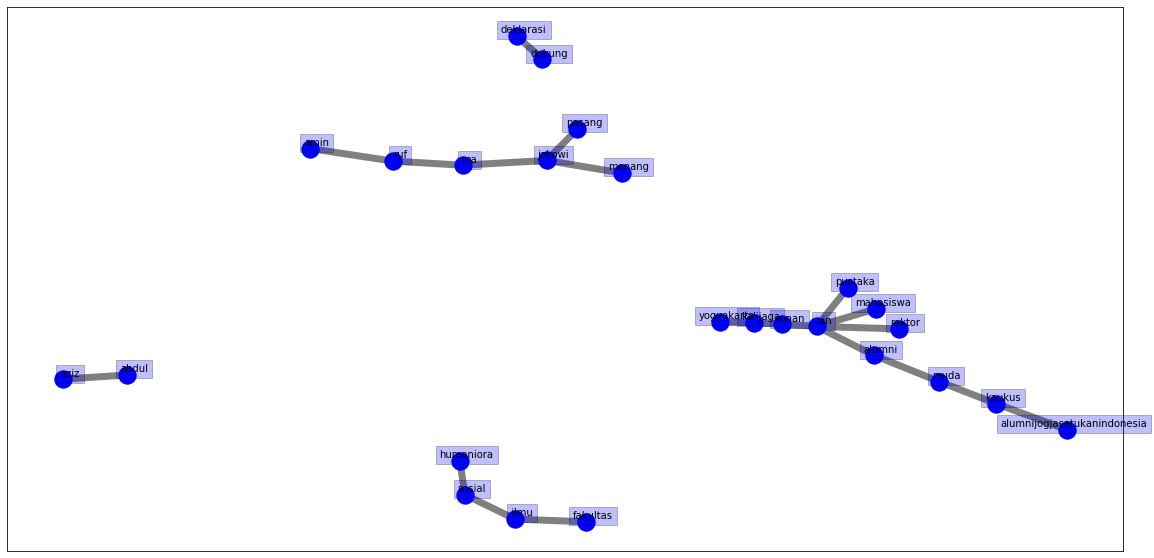

In [41]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=2)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

### tri-grams

In [42]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),3)).value_counts()

(uin, sunan, kalijaga)           2514
(sunan, kalijaga, yogyakarta)    1039
(alumni, uin, sunan)              251
(muda, alumni, uin)               196
(kaukus, muda, alumni)            196
                                 ... 
(ibuk, embak, adik)                 1
(yogyakarta, khasmedia, aris)       1
(liberal, sesat, silah)             1
(ist, rektor, uin)                  1
(amp, smg, ilmu)                    1
Length: 25301, dtype: int64

In [43]:
trigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      3)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'trigram',1:'count'})

In [44]:
trigram_df

,index,trigram
0,"(uin, sunan, kalijaga)",2514
1,"(sunan, kalijaga, yogyakarta)",1039
2,"(alumni, uin, sunan)",251
3,"(muda, alumni, uin)",196
4,"(kaukus, muda, alumni)",196
5,"(mahasiswa, uin, sunan)",138
6,"(jokowi, ma, ruf)",131
7,"(rektor, uin, sunan)",115
8,"(ma, ruf, amin)",81
9,"(pustaka, uin, sunan)",79


In [45]:
# create dictionary of bigrams and their counts
d1 = trigram_df.set_index('index').T.to_dict('records')

In [46]:
d1

[{('uin', 'sunan', 'kalijaga'): 2514,
  ('sunan', 'kalijaga', 'yogyakarta'): 1039,
  ('alumni', 'uin', 'sunan'): 251,
  ('muda', 'alumni', 'uin'): 196,
  ('kaukus', 'muda', 'alumni'): 196,
  ('mahasiswa', 'uin', 'sunan'): 138,
  ('jokowi', 'ma', 'ruf'): 131,
  ('rektor', 'uin', 'sunan'): 115,
  ('ma', 'ruf', 'amin'): 81,
  ('pustaka', 'uin', 'sunan'): 79,
  ('ilmu', 'sosial', 'humaniora'): 78,
  ('fakultas', 'ilmu', 'sosial'): 77,
  ('ruf', 'amin', 'pilpres'): 68,
  ('kalijaga', 'yogyakarta', 'deklarasi'): 65,
  ('yogyakarta', 'deklarasi', 'dukung'): 65,
  ('muda', 'uin', 'sunan'): 64,
  ('alumni', 'muda', 'uin'): 63,
  ('deklarasi', 'dukung', 'politik'): 63,
  ('dukung', 'politik', 'pasang'): 63,
  ('kuliah', 'uin', 'sunan'): 60}]

In [47]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d1[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("uin",weight=100)

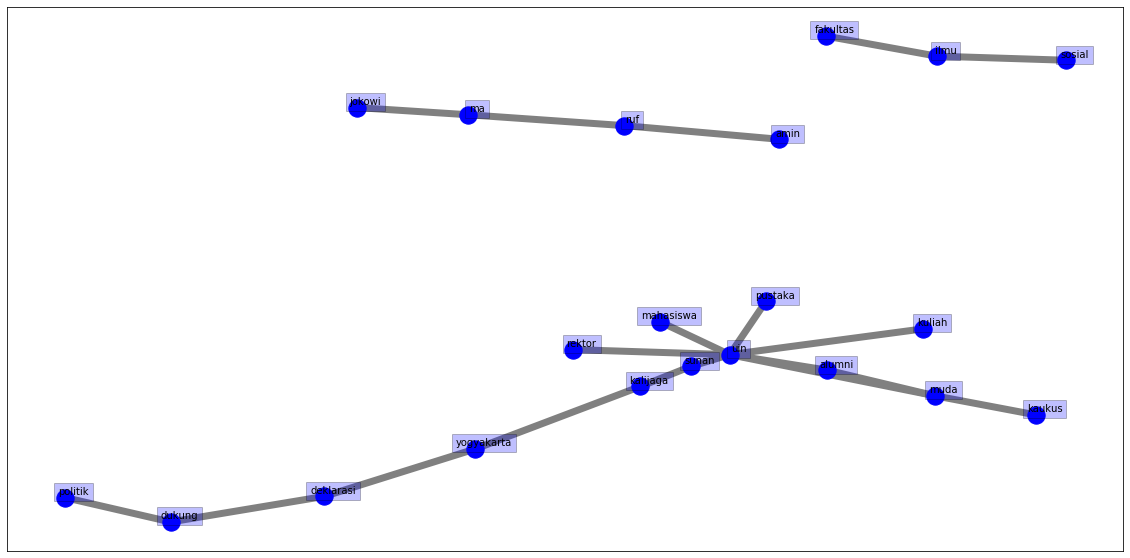

In [48]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=3)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

In [49]:
pwd

'C:\\Users\\Andika\\Desktop\\Project UNISA\\in depth analysis\\kampus islam jogja\\uin'

In [51]:
pos_tag.head(50)

,Word,Weight,POS
0,muda,56.870390,JJ
1,ruf,40.291613,JJ
2,sosial,20.933260,JJ
3,salah,15.927437,JJ
4,kuat,14.599565,JJ
5,utama,13.039948,JJ
6,religius,12.620919,JJ
7,tempuh,12.293910,JJ
8,formal,11.379765,JJ
9,viral,9.989303,JJ
